# Crach Web Scrape Notes (Python-BeautifulSoup)

### =======Syllabus=======
__1. Introduction to Web Scrape__

__2. Python Libraries__

__3. Checking The Status Of a Web Site__

    3.1. Status Codes
    3.2. Header Editing
__4. Editing URLs__
    
    4.1. Adding Standard Parameters To a URL
    4.2. Google Search URL Parameters
    4.3. Adding Variable-Parameters To a URL
    4.4. Finding The Parameters In URLs
__5. Gathering Content__
    
    5.1. General Content
    5.2. Specific Content
    5.3. CAPSTONE-1
    5.4. BONUS: Scrape Tables with Pandas

__6. Some Other Usefull Information__
    
    6.1. Adding Cookies To Requests
    6.2. Scraping via Proxies

__7. CAPSTONE-2__



### 1. Introduction to Web Scrape

Web Scraping is an efficient way to extract data from open sources (different websites). It is an automated process that;
- reaching a web site (URL) by browser (ex:Selenium library for Python) or by HTTP directly (ex: BeautifulSoup library for Python)
- surpassing the captcha or any other security precautions (if exists)
- finding the relevant (wanted) data
- gathering the data
- saving the data in structured type (to a database, .CSV file..etc) 

<img src="https://github.com/msklc/crash_web_scrape_notes/blob/master/images/web_scrape_schema.jpg?raw=true">

2 main issue for web scrape:
- Editing the URL
- Finding the content location for gathering 

<img src="https://github.com/msklc/crash_web_scrape_notes/blob/master/images/2main_issue.jpg?raw=true">

### 2. Python Libraries

__via directly HTTP__
- [Requests](https://requests.readthedocs.io/en/master/)
- [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- urllib
- Scrapy
- LXML
- Pandas ????

__via Browser__
- Selenium

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

print('requests version:', requests.__version__)
print('BeautifulSoup version:', bs4.__version__)

requests version: 2.22.0
BeautifulSoup version: 4.8.0


### 3. Checking The Status Of a Web Site

__3.1. Status Codes__
- 200 : OK (Successfuly Connection)
- 3xx : Redirection
- 400 : Bad Request
- 401 : Unauthorized
- 403 : Forbidden
- 404 : Not Found
- 5xx Server Error
    - 500 : Internal Server Error
    - 501 : Not Implemented
    - 502 : Bad Gateway
    - 503 : Service Unavailable
    - 504 : Gateway Timeout

__Example__

In [2]:
import requests
url='http://www.google.com'
r=requests.get(url)
r.status_code

200

__More Example__

In [12]:
import requests
url_list=['http://www.deeploai.com', 'http://worldagnetwork.com', 'http://www.deeploai.com/notfound.php','http://www.odatv.com','http://www.tr724.com']
for url in url_list:
    r=requests.get(url)
    print('{} : {}'.format(url,r.status_code))

http://www.deeploai.com : 200
http://worldagnetwork.com : 403
http://www.deeploai.com/notfound.php : 404
http://www.odatv.com : 200
http://www.tr724.com : 403


__Question 1:__
- What is the reason of Error-403? Is it possible to surpass this error?

__3.2. Header Editing__

In [7]:
import requests
url = 'http://worldagnetwork.com/'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}
r=requests.get(url, headers=headers)
print('Request via normal browser: {}'.format(r.status_code))
mobile_headers = {'User-Agent' : 'Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Mac OS X) AppleWebKit/601.1.46 (KHTML, like Gecko) Version/9.0 Mobile/13B137 Safari/601.1'}
r=requests.get(url, headers=mobile_headers)
print('Request via mobile browser: {}'.format(r.status_code))

Request via normal browser: 200
Request via mobile browser: 200


### 4. Editing URLs

__4.1. Adding Standard Parameters To a URL__

In [8]:
import requests
url='http://www.domainname.com/'
payload = {'key1': 'value1', 'key2': 'value2'}
r=requests.get(url, params=payload)
print(r.url)

http://www.domainname.com/?key1=value1&key2=value2


__Question-2:__

How can you edit the URLs that every URL has a only one key-value pairs from payload?

In [9]:
import requests
url='http://www.domainname.com/'
payload = {'key1': 'value1', 'key2': 'value2'}
for k,v in payload.items():
    r=requests.get(url, params={k:v})
    print(r.url)

http://www.domainname.com/?key1=value1
http://www.domainname.com/?key2=value2


__4.2. Google Search URL Parameters__

Basic URL: http://www.google.com/search?

- Single Keyword Query: __q=__deeploai

- Multiple Keyword Query: __q=__deeploai+netherlands

- Keyword(s) in Quotes: __as_epq=__deeploai+netherlands

- Limit the Result Number: __num=__100

- File Type: __as_filetype=__pdf

- Search in Spesific Web Site: __as_sitesearch=__deeploai.com

- Search in Spesific Time Duration: 

    - The previous 24 hours : __as_qdr=d__
    - The previous seven days : __as_qdr=w__
    - The previous month : __as_qdr=m__
    - The previous 3 month :__as_qdr=m3__
    - Past year: __as_qdr=y__

[Detail For Google URL Parameters](https://moz.com/blog/the-ultimate-guide-to-the-google-search-parameters)


__Example__

In [7]:
import requests
url='http://www.google.com/search?'
payload = {'q': 'deeploai', 'as_qdr': '7'}
r=requests.get(url, params=payload)
print(r.url)

http://www.google.com/search?q=deeploai&as_qdr=7


__4.3. Adding Variable-Parameters To a URL__

Get URLs with keywords from list

In [16]:

import requests
keywords=['data+scientist','data+engineer','data+analist']
for n in keywords:
    url='https://www.indeed.nl/job?q={}'.format(n)
    r=requests.get(url)
    print(r.url)

https://www.indeed.nl/job?q=data+scientist
https://www.indeed.nl/job?q=data+engineer
https://www.indeed.nl/job?q=data+analist


Get URLs with page numbers

In [15]:
#or 
import requests
keywords=['data+scientist','data+engineer','data+analist']
for n in range(len(keywords)):
    url='https://www.indeed.nl/job?q={}'.format(keywords[n])
    r=requests.get(url)
    print(r.url)

https://www.indeed.nl/job?q=data+scientist
https://www.indeed.nl/job?q=data+engineer
https://www.indeed.nl/job?q=data+analist


In [9]:
# or 
import requests
keywords=['pandas']
for n in range(1,11):
    url='https://stackoverflow.com/questions/tagged/{}?tab=newest&page={}'.format(keywords[0],n)
    r=requests.get(url)
    print(r.url)

https://stackoverflow.com/questions/tagged/pandas
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=2
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=3
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=4
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=5
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=6
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=7
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=8
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=9
https://stackoverflow.com/questions/tagged/pandas?tab=newest&page=10


__4.4. Finding The Parameters In URLs__

What is the parameters of a URL for a query for 'https://www.internationalparceltracking.com'?

We get the parameters from the browser Developer Console:
- Developer Console >> Network Tab >> Headers Tab >> Query String Parameters (For Chrome)
- Web Developer >> Network Tab >> Params Tab (For Firefox)


<img src="https://github.com/msklc/crash_web_scrape_notes/blob/master/images/browser_DeveloperConsole.jpg?raw=true">

__Question-3:__

What is the URL of barcode with '000000000' from France at PostNL?

### 5. Gathering Content

__5.1. General Content__

In [10]:
#List of municipalities of the Netherlands at wikipedia
import requests
url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
r.content


b'<html>\r\n<head><title>403 Forbidden</title></head>\r\n<body>\r\n<center><h1>403 Forbidden</h1></center>\r\n<hr><center>nginx</center>\r\n</body>\r\n</html>\r\n'

b'<!doctype html >\r\n<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->\r\n<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html lang="tr"> <!--<![endif]-->\r\n<head>\r\n    <title>Adem Yavuz Arslan, Yazar: Tr724</title>\r\n    <meta charset="UTF-8" />\r\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\r\n    <link rel="pingback" href="https://www.tr724.com/xmlrpc.php" />\r\n    \n<!-- This site is optimized with the Yoast SEO plugin v11.8 - https://yoast.com/wordpress/plugins/seo/ -->\n<link rel="canonical" href="https://www.tr724.com/author/ademyavuz/" />\n<link rel="next" href="https://www.tr724.com/author/ademyavuz/page/2/" />\n<meta property="og:locale" content="tr_TR" />\n<meta property="og:type" content="object" />\n<meta property="og:title" content="Adem Yavuz Arslan, Yazar: Tr724" />\n<meta property="og:url" content="https://www.tr724.com/author/ademyavuz/" />\n<meta property="og:site_name" content="Tr7
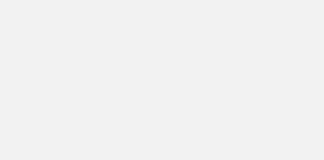
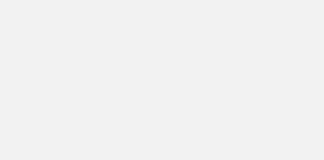
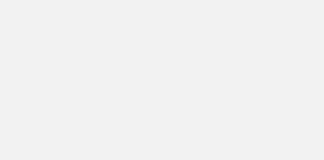
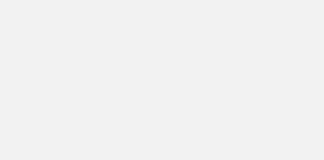
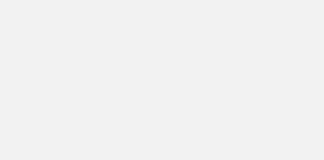
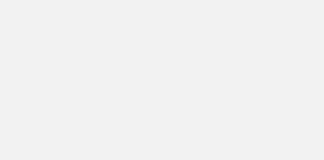
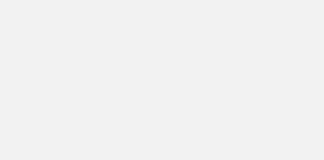
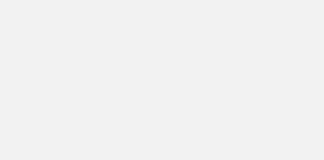
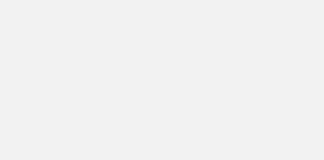
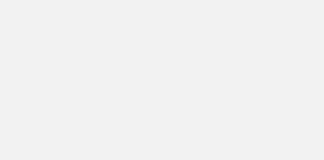

In [13]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

url='https://www.tr724.com/author/ademyavuz/'
r=requests.get(url, headers=headers)

r.content

__It is not easy to gathering relevant data!!!__

So, we prefer to use BeautifulSoup to get the relevant data easily;

In [11]:
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of municipalities of the Netherlands - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XleBhApAML8AA-EociwAAADU","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_municipalities_of_the_Netherlands","wgTitle":"List of municipalities of the Netherlands","wgCurRevisionId":938783108,"wgRevisionId":938783108,"wgArticleId":228467,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["

__5.2. Specific Content__

We need to understand the defination of __tags__ in HTML

<img src="https://github.com/msklc/crash_web_scrape_notes/blob/master/images/tags_of_HTML.jpg?raw=true">

| Tag | Description |
| --- | --- |
| __div__ | Division/Section in a page | 
| __table__ | Defines a table | 
| __th__ | Defines a header cell in a table | 
| __tr__ | Defines a row in a table | 
| __td__ | Defines a cell in a table | 	
| __span__ | Generic inline container |
| __a__ | Defines a hyperlink |


<img src="https://github.com/msklc/crash_web_scrape_notes/blob/master/images/browser_inspector.jpg?raw=true">

__Example:__

Find all hyperlinks in previous page

In [12]:
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

links = soup.find_all('a')
print('Total hyperlinks in the page:',len(links))
print(links)

Total hyperlinks in the page: 1674
[<a id="top"></a>, <a href="/wiki/Wikipedia:Featured_lists" title="This is a featured list. Click here for more information."><img alt="This is a featured list. Click here for more information." data-file-height="438" data-file-width="462" decoding="async" height="19" src="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/20px-Cscr-featured.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/30px-Cscr-featured.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/e/e7/Cscr-featured.svg/40px-Cscr-featured.svg.png 2x" width="20"/></a>, <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>, <a class="mw-jump-link" href="#p-search">Jump to search</a>, <a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>, <a class="image" href="/wiki/File:State_coat_of_arms_of_the_Netherlands.svg" title='Azure, billetty Or a lion with a coronet Or armed and langued Gules holding in his dexter paw a sword Ar

__Example:__

Find all __http__ hyperlinks in previous page

In [13]:
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

links = soup.find_all('a')

for link in links:
    tag=link.get('href')
    try:
        print(tag) if 'http' in tag else None
    except:
        None

https://commons.wikimedia.org/wiki/Atlas_of_Netherlands
https://en.wikipedia.org/w/index.php?title=Template:Politics_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://en.wikipedia.org/w/index.php?title=List_of_municipalities_of_the_Netherlands&action=edit
https://www.cbs.nl/nl-nl/onze-diensten/methoden/classificaties/overig/gemeentelijke-indelingen-per-jaar/indeling%20per%20jaar/gemeentelijke-indeling-op-1-januari-2018
http:/

__Question-3:__

Why we need to use __try__ in previous example?

__Example:__

Gather the specific string: __25,386__

In [14]:
#find vs find_all
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

tag = soup.find('span',{'data-sort-value':"7004253860000000000♠"}).text
tag

'25,386'

__Example:__

Gather the all Municipalities name

In [15]:
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

table=soup.find('table',{'class':'wikitable plainrowheaders sortable'})
table

<table class="wikitable plainrowheaders sortable" style="text-align: center;">
<tbody><tr>
<th scope="col">Municipality
</th>
<th scope="col">CBS code<sup class="reference" id="cite_ref-CBS_code_14-1"><a href="#cite_note-CBS_code-14">[14]</a></sup>
</th>
<th scope="col">Province
</th>
<th scope="col">Population<sup class="reference" id="cite_ref-28"><a href="#cite_note-28">[a]</a></sup><sup class="reference" id="cite_ref-CBS_key_figs_29-0"><a href="#cite_note-CBS_key_figs-29">[28]</a></sup>
</th>
<th scope="col">Population density<sup class="reference" id="cite_ref-30"><a href="#cite_note-30">[b]</a></sup><sup class="reference" id="cite_ref-CBS_key_figs_29-1"><a href="#cite_note-CBS_key_figs-29">[28]</a></sup>
</th>
<th scope="col">Land area<sup class="reference" id="cite_ref-31"><a href="#cite_note-31">[c]</a></sup><sup class="reference" id="cite_ref-CBS_key_figs_29-2"><a href="#cite_note-CBS_key_figs-29">[28]</a></sup>
</th>
<th class="unsortable" scope="col">Map
</th></tr>
<tr>
<th 

In [16]:
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

table=soup.find('table',{'class':'wikitable plainrowheaders sortable'})
municipalities=table.find_all('th')

for row in municipalities:
    print(row.text.strip())


Municipality
CBS code[14]
Province
Population[a][28]
Population density[b][28]
Land area[c][28]
Map
Aa en Hunze
Aalsmeer
Aalten
Achtkarspelen
Alblasserdam
Albrandswaard
Alkmaar
Almelo
Almere
Alphen aan den Rijn
Alphen-Chaam
Altena
Ameland
Amersfoort
Amstelveen
Amsterdam
Apeldoorn
Appingedam
Arnhem
Assen
Asten
Baarle-Nassau
Baarn
Barendrecht
Barneveld
Beek
Beekdaelen
Beemster
Beesel
Berg en Dal
Bergeijk
Bergen (LI)
Bergen (NH)
Bergen op Zoom
Berkelland
Bernheze
Best
Beuningen
Beverwijk
Bladel
Blaricum
Bloemendaal
Bodegraven-Reeuwijk
Boekel
Borger-Odoorn
Borne
Borsele
Boxmeer
Boxtel
Breda
Brielle
Bronckhorst
Brummen
Brunssum
Bunnik
Bunschoten
Buren
Capelle aan den IJssel
Castricum
Coevorden
Cranendonck
Cuijk
Culemborg
Dalfsen
Dantumadiel
De Bilt
De Fryske Marren
De Ronde Venen
De Wolden
Delft
Delfzijl
Den Helder
Deurne
Deventer
Diemen
Dinkelland
Doesburg
Doetinchem
Dongen
Dordrecht
Drechterland
Drimmelen
Dronten
Druten
Duiven
Echt-Susteren
Edam-Volendam
Ede
Eemnes
Eersel
Eijsden-Margrate

__5.3. CAPSTONE-1:__

- Gather __all detail data__ of municipalities from wikipedia
- Save them to CSV file

In [17]:
import requests
from bs4 import BeautifulSoup

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

table=soup.find('table',{'class':'wikitable plainrowheaders sortable'})
rows=table.find_all('tr')[1:]

for row in rows:
    municipality=row.find('th').text.strip()
    print(municipality)
    cbs_code=row.find_all('td')[0].text.strip()
    print(cbs_code)
    province=row.find_all('td')[1].text.strip()
    print(province)
    population=row.find_all('td')[2].text.strip()
    print(population)
    pop_density=row.find_all('td')[3].text.strip()
    print(pop_density)
    land_area=row.find_all('td')[4].text.strip()
    print(land_area)
    print('=======')


Aa en Hunze
1680
Drenthe
25,386
92/km2 (240/sq mi)
276.09 km2 (106.60 sq mi)
Aalsmeer
0358
North Holland
31,728
1,577/km2 (4,080/sq mi)
20.12 km2 (7.77 sq mi)
Aalten
0197
Gelderland
27,011
280/km2 (730/sq mi)
96.54 km2 (37.27 sq mi)
Achtkarspelen
0059
Friesland
27,852
272/km2 (700/sq mi)
102.23 km2 (39.47 sq mi)
Alblasserdam
0482
South Holland
20,069
2,286/km2 (5,920/sq mi)
8.78 km2 (3.39 sq mi)
Albrandswaard
0613
South Holland
25,271
1,165/km2 (3,020/sq mi)
21.69 km2 (8.37 sq mi)
Alkmaar
0361
North Holland
108,558
983/km2 (2,550/sq mi)
110.46 km2 (42.65 sq mi)
Almelo
0141
Overijssel
72,849
1,083/km2 (2,800/sq mi)
67.27 km2 (25.97 sq mi)
Almere
0034
Flevoland
207,904
1,609/km2 (4,170/sq mi)
129.19 km2 (49.88 sq mi)
Alphen aan den Rijn
0484
South Holland
110,986
879/km2 (2,280/sq mi)
126.23 km2 (48.74 sq mi)
Alphen-Chaam
1723
North Brabant
10,149
109/km2 (280/sq mi)
93.04 km2 (35.92 sq mi)
Altena
1959
North Brabant
55,386
276/km2 (710/sq mi)
200.63 km2 (77.46 sq mi)
Ameland
0060
Friesla

36.53 km2 (14.10 sq mi)
Zaanstad
0479
North Holland
155,885
2,110/km2 (5,500/sq mi)
73.87 km2 (28.52 sq mi)
Zaltbommel
0297
Gelderland
28,451
358/km2 (930/sq mi)
79.38 km2 (30.65 sq mi)
Zandvoort
0473
North Holland
17,011
530/km2 (1,400/sq mi)
32.12 km2 (12.40 sq mi)
Zeewolde
0050
Flevoland
22,309
90/km2 (230/sq mi)
247.23 km2 (95.46 sq mi)
Zeist
0355
Utrecht
63,934
1,318/km2 (3,410/sq mi)
48.51 km2 (18.73 sq mi)
Zevenaar
0299
Gelderland
43,488
470/km2 (1,200/sq mi)
92.60 km2 (35.75 sq mi)
Zoetermeer
0637
South Holland
124,944
3,627/km2 (9,390/sq mi)
34.45 km2 (13.30 sq mi)
Zoeterwoude
0638
South Holland
8,450
399/km2 (1,030/sq mi)
21.19 km2 (8.18 sq mi)
Zuidplas
1892
South Holland
42,762
737/km2 (1,910/sq mi)
58.02 km2 (22.40 sq mi)
Zundert
0879
North Brabant
21,612
179/km2 (460/sq mi)
120.65 km2 (46.58 sq mi)
Zutphen
0301
Gelderland
47,609
1,163/km2 (3,010/sq mi)
40.95 km2 (15.81 sq mi)
Zwartewaterland
1896
Overijssel
22,503
273/km2 (710/sq mi)
82.49 km2 (31.85 sq mi)
Zwijndrecht
064

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
r=requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

table=soup.find('table',{'class':'wikitable plainrowheaders sortable'})
rows=table.find_all('tr')[1:]

municipalities=[]
cbs_codes=[]
provinces=[]
populations=[]
pop_densities=[]
land_areas=[]


for row in rows:
    municipality=row.find('th').text.strip()
    municipalities.append(municipality)
    cbs_code=row.find_all('td')[0].text.strip()
    cbs_codes.append(cbs_code)
    province=row.find_all('td')[1].text.strip()
    provinces.append(province)
    population=row.find_all('td')[2].text.strip()
    populations.append(population)
    pop_density=row.find_all('td')[3].text.strip()
    pop_densities.append(pop_density)
    land_area=row.find_all('td')[4].text.strip()
    land_areas.append(land_area)

#Create dataframe
df = pd.DataFrame({'Municipality':municipalities,'CBS Code':cbs_codes,'Province':provinces,
                   'Population':populations,'Population Density':pop_densities,'Land Area':land_areas})
df.head()

,Municipality,CBS Code,Province,Population,Population Density,Land Area
0,Aa en Hunze,1680,Drenthe,"25,386",92/km2 (240/sq mi),276.09 km2 (106.60 sq mi)
1,Aalsmeer,0358,North Holland,"31,728","1,577/km2 (4,080/sq mi)",20.12 km2 (7.77 sq mi)
2,Aalten,0197,Gelderland,"27,011",280/km2 (730/sq mi),96.54 km2 (37.27 sq mi)
3,Achtkarspelen,0059,Friesland,"27,852",272/km2 (700/sq mi),102.23 km2 (39.47 sq mi)
4,Alblasserdam,0482,South Holland,"20,069","2,286/km2 (5,920/sq mi)",8.78 km2 (3.39 sq mi)


In [19]:
#Save scraped data to CSV file
df.to_csv('Municipalities_of_NL.csv')

__5.4. BONUS: Scrape Tables with Pandas__

In [20]:
import pandas as pd
url='https://en.wikipedia.org/wiki/List_of_municipalities_of_the_Netherlands'
table=pd.read_html(url,match='Aa en Hunze')
table[0]

,Municipality,CBS code[14],Province,Population[a][28],Population density[b][28],Land area[c][28],Map
0,Aa en Hunze,1680,Drenthe,25386,92/km2 (240/sq mi),276.09 km2 (106.60 sq mi),NaN
1,Aalsmeer,358,North Holland,31728,"1,577/km2 (4,080/sq mi)",20.12 km2 (7.77 sq mi),NaN
2,Aalten,197,Gelderland,27011,280/km2 (730/sq mi),96.54 km2 (37.27 sq mi),NaN
3,Achtkarspelen,59,Friesland,27852,272/km2 (700/sq mi),102.23 km2 (39.47 sq mi),NaN
4,Alblasserdam,482,South Holland,20069,"2,286/km2 (5,920/sq mi)",8.78 km2 (3.39 sq mi),NaN
...,...,...,...,...,...,...,...
350,Zundert,879,North Brabant,21612,179/km2 (460/sq mi),120.65 km2 (46.58 sq mi),NaN
351,Zutphen,301,Gelderland,47609,"1,163/km2 (3,010/sq mi)",40.95 km2 (15.81 sq mi),NaN
352,Zwartewaterland,1896,Overijssel,22503,273/km2 (710/sq mi),82.49 km2 (31.85 sq mi),NaN
353,Zwijndrecht,642,South Holland,44639,"2,199/km2 (5,700/sq mi)",20.30 km2 (7.84 sq mi),NaN


### 6. Some Other Usefull Information

__6.1. Adding Cookies To Requests__

__Question-4:__

- What is the reason of Error-403? Is it possible to surpass this error?

We get the cookies from the browser Developer Console:
- Developer Console >> Application Tab >> Cookies Tab (For Chrome)
- Web Developer >> Storage Tab >> Cookies Tab (For Firefox)


<img src="https://github.com/msklc/crash_web_scrape_notes/blob/master/images/sessionID_chrome.jpg?raw=true">

In [21]:
import requests
url='https://www.deeploai.com'
cookie = {'PHPSESSID': 'XXXX','ZHE':'YYY'}
r = requests.post(url, cookies=cookie)
print(r.status_code)

200


__6.2. Scraping via Proxies__

In [24]:
import requests
url='https://www.deeploai.com'
proxies = {'http': '110.74.209.202:51491'} #free proxy adress

r = requests.get(url, proxies=proxies)
print(r.status_code)

200


### 7. CAPSTONE-2

- Scrape all Angola movies from IMDB
    - Movie names
    - Produced Year
    - IMDB Rank
- Save them to CSV file

(Hint: Use IMDB Advance search page 'https://www.imdb.com/search/title/')

Good Luck!!!